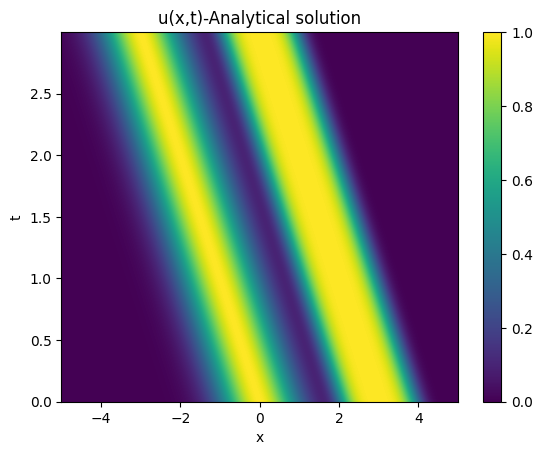

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Variables
f0 =lambda x,t: np.exp(-(x-3+t)**4)+np.exp(-(x+t)**2)
dx=10**-3 
dt=0.002
v=1
r=dt/dx
x=np.arange(-5,5,dx)
t=np.arange(0,3,dt)

# Plot - Analytical solution
X,T=np.meshgrid(x,t)
fig,ax=plt.subplots()            
im=ax.imshow(f0(X,T),aspect='auto',extent=(x[0],x[-1],t[0],t[-1]),
             origin='lower')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_title(f'u(x,t)-Analytical solution') 
fig.colorbar(im, ax=ax)

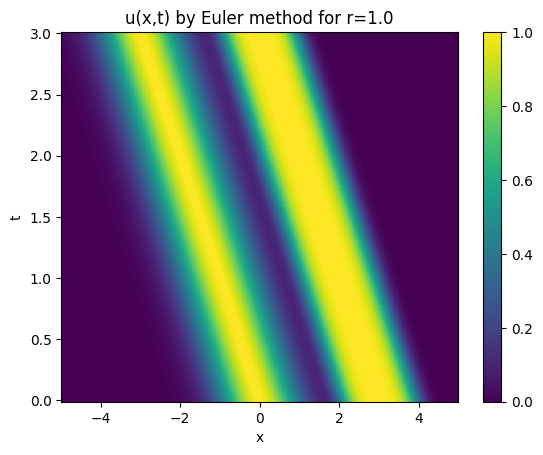

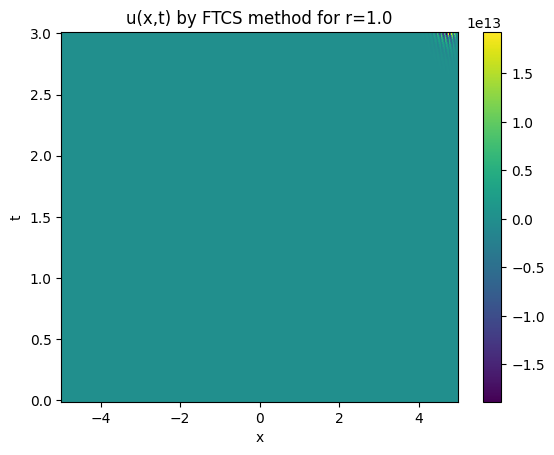

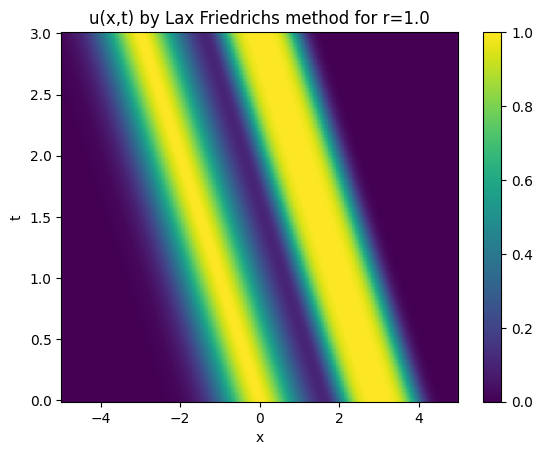

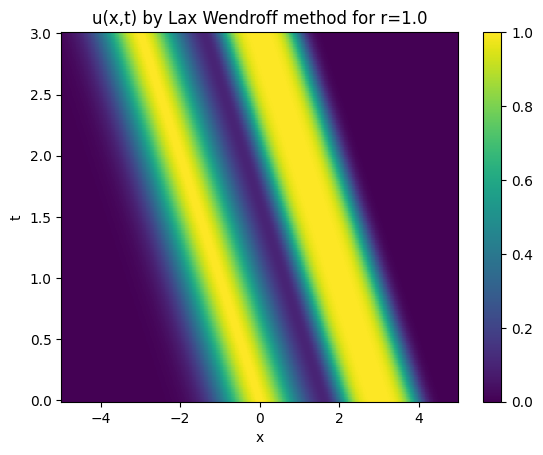

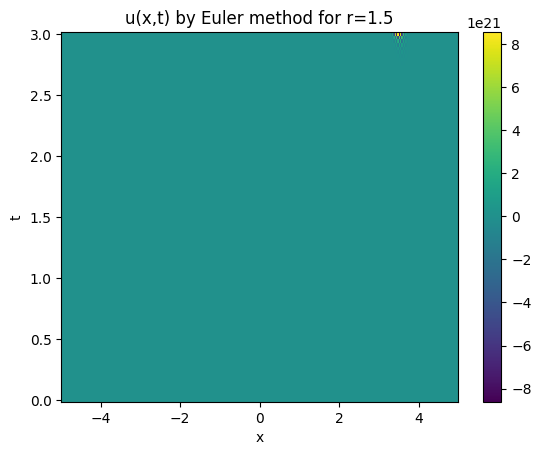

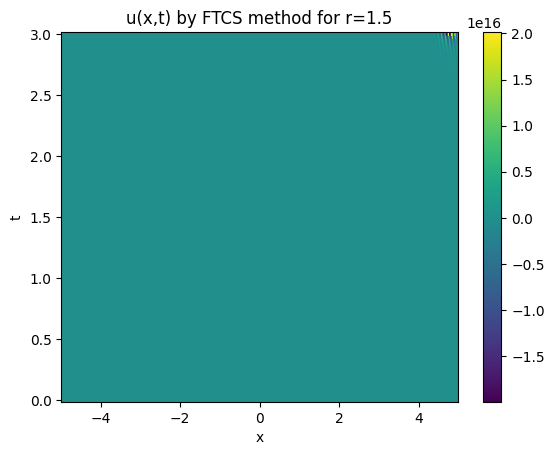

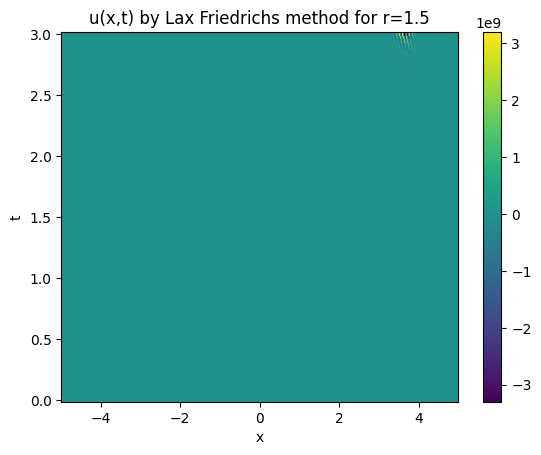

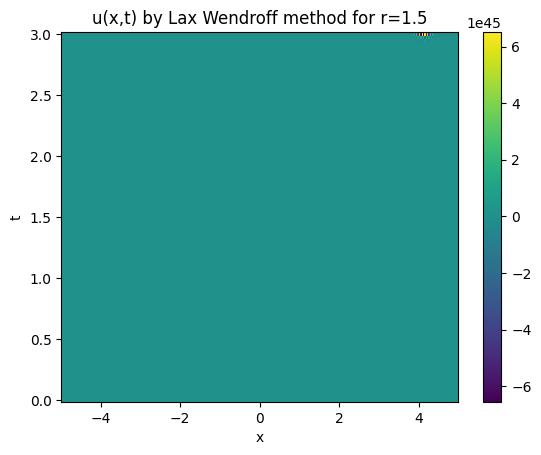

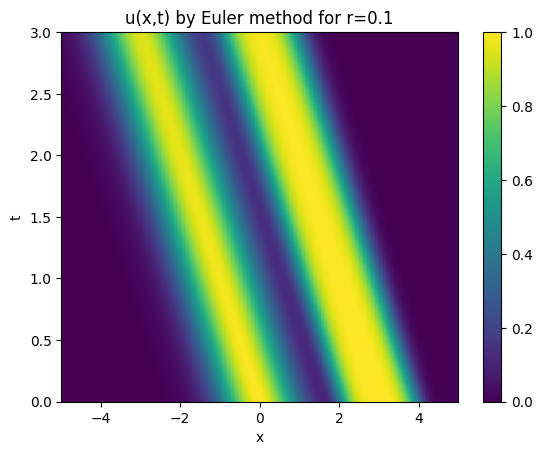

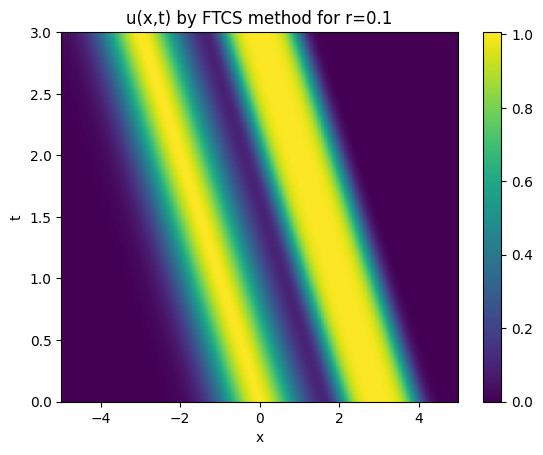

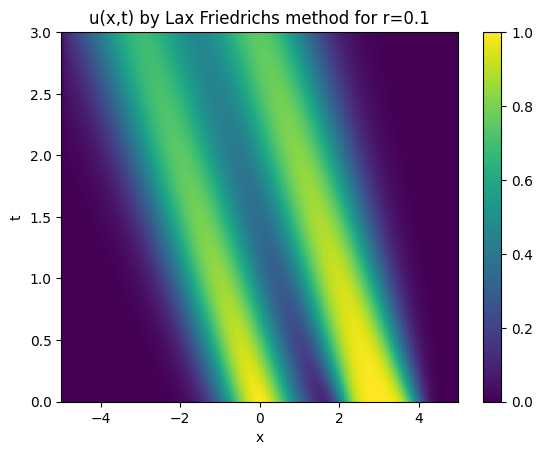

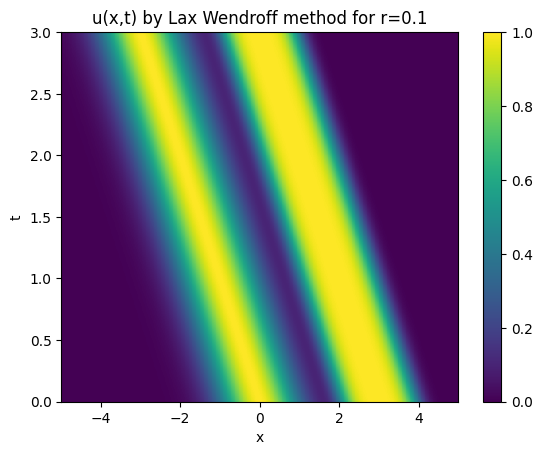

In [62]:
# Parameters
dx=0.02 
dt_vector=[0.02,0.03,0.002]
v=1
x=np.arange(-5+dx,5,dx)
y0=lambda x: np.exp(-(x-3)**4)+np.exp(-(x)**2)
Label_list=['Euler','FTCS','Lax Friedrichs','Lax Wendroff']

# General solution pattern
def solve_wave(Mat,y0,x,dt):
    t=np.arange(0,3+dt,dt)
    y=np.empty((np.size(x),np.size(t)))
    y[:,0]=y0(x)
    
    for i in range(1,np.size(t)):
        y[:,i]=Mat@y[:,i-1]
    return y    

# Plot solutions function        
def plot_solutions(x,dt,y,label): 
    t=np.arange(0,3+dt,dt)
    fig,ax=plt.subplots()            
    im=ax.pcolormesh(x,t,y.T)
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_title(f'u(x,t) by {label} method for r={dt/dx}')
    fig.colorbar(im, ax=ax)
    
# Function that creates matrices for given r    
def create_matrices(dx,dt,x):
    t=np.arange(0,3+dt,dt)
    r=dt/dx
    
    Eu=np.eye(np.size(x))-r*np.diag(np.ones(np.size(
        x)))+r*np.diag(np.ones(np.size(x)-1),1)

    FTCS=np.eye(np.size(x))+r/2*np.diag(np.ones(
        np.size(x)-1),1)-r/2*np.diag(np.ones(np.size(x)-1),-1)

    LF=(1+r)/2*np.diag(np.ones(np.size(x)-1),1)+(
        1-r)/2*np.diag(np.ones(np.size(x)-1),-1)

    LW=r*(r+1)/2*np.diag(np.ones(np.size(x)-1),
        1)+r*(r-1)/2*np.diag(np.ones(np.size(x)-1),-1
                               )+(1-r**2)*np.diag(np.ones(np.size(x)))
    return Eu,FTCS,LF,LW

# Plots
for dt in dt_vector:
    Mat_list=list(create_matrices(dx,dt,x))
    
    for (Mat,label) in zip(Mat_list,Label_list):
        y=solve_wave(Mat,y0,x,dt)
        plot_solutions(x,dt,y,label)    

Text(0.5, 1.0, 'u(x,t=3) and r=0.1 for all methods')

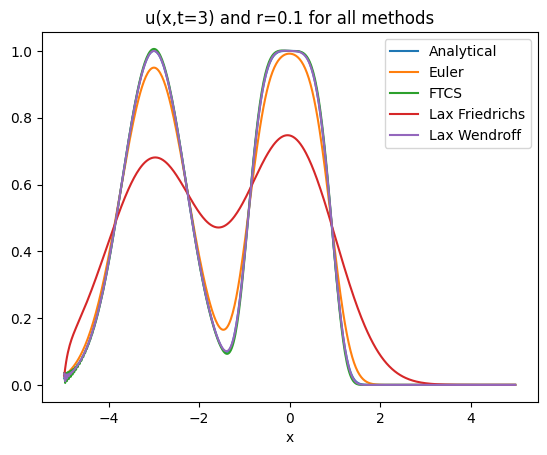

In [63]:
# All solutions at t=3 plots
fig,ax=plt.subplots()
ax.plot(x,y0(x+3),label='Analytical')
for i in range(0,4):
    ax.plot(x,solve_wave(create_matrices(dx,dt_vector[-1]
                    ,x)[i],y0,x,dt_vector[-1])[:,-1],label=Label_list[i])
ax.legend(loc='upper right')   
ax.set_xlabel('x')
ax.set_title('u(x,t=3) and r=0.1 for all methods')